# Veri Analizi Yapma

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train.info())
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [5]:
null_columns_train = train.columns[train.isnull().any()]
print(train[null_columns_train].isnull().sum())

null_columns_test = test.columns[test.isnull().any()]
print(test[null_columns_test].isnull().sum())

Series([], dtype: float64)
Series([], dtype: float64)


In [6]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (42000, 785)
Test shape: (28000, 784)


In [7]:
y_train = train["label"]

x_train = train.drop(labels = ["label"],axis = 1) 

In [8]:
print(f"Y Train shape: {y_train.shape}")
print(f"X Train shape: {x_train.shape}")
print(f"Test shape: {test.shape}")

Y Train shape: (42000,)
X Train shape: (42000, 784)
Test shape: (28000, 784)


label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

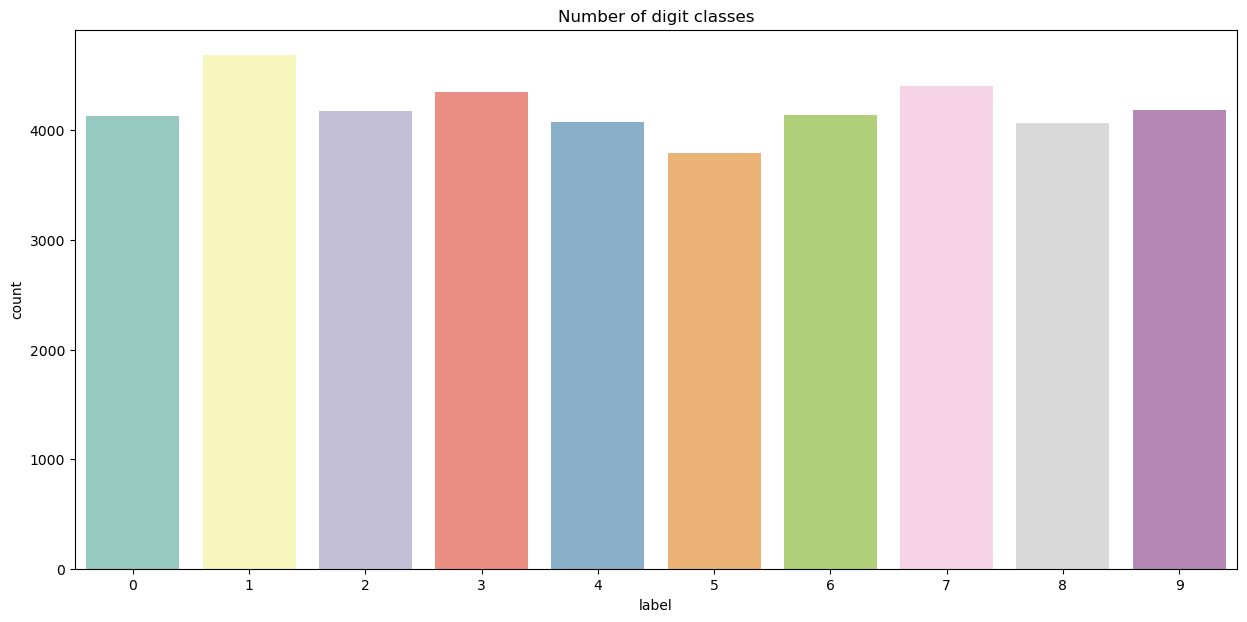

In [9]:
plt.figure(figsize=(15,7))
g = sns.countplot(x=y_train, palette="Set3")
plt.title("Number of digit classes")
y_train.value_counts()

# Veri Ön İşlemesi

### Veri ön işlemede yapılması önemli olan üç işlem vardır:

1- Normalizasyon: Piksel değerlerini 0-255 aralığından 0-1 aralığına normalleştirmek, modelin daha hızlı öğrenmesini sağlar.

In [13]:
print(f"Y Train shape: {y_train.shape}")
print(f"X Train shape: {x_train.shape}")
print(f"Test shape: {test.shape}")

Y Train shape: (42000,)
X Train shape: (42000, 784)
Test shape: (28000, 784)


In [14]:
x_train = x_train / 255.0
test = test / 255.0

2-Görüntülerin Yeniden Boyutlandırılması: CNN modeline uygun hale getirmek için tüm görüntüleri aynı boyuta getirmeniz gerekir (örneğin, 28x28, 64x64, vb.) 

Verilerimiz 784 pikselden oluştuğu için 28x28'lik matris seçiyoruz.

-1: Bu değer, boyutların birinin otomatik olarak hesaplanmasını sağlar. Yani, X_train'in boyutuna bağlı olarak gerekli olan uygun değeri alır.

1: Bu değer, renk kanalı sayısını belirtir. 1 değeri, gri tonlamalı (siyah-beyaz) görüntüleri ifade eder. Renkli görüntülerde bu değer genellikle 3 olur (RGB kanalları için).

X_train.values: Eğer X_train bir pandas DataFrame ise, .values metodu bu DataFrame'i NumPy dizisine (numpy array) dönüştürür.

In [16]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

3- Etiketlerin Kodlanması: Etiketleriniz kategorik ise, bu etiketleri one-hot encoding gibi bir yöntemle sayısal değerlere dönüştürmeniz gerekebilir.

In [18]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train.values, num_classes=10)

## Veri setinin bölünmesi

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

## Model Oluşturma

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [23]:
model = Sequential()

# 1. Convolutional Layer
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides=(1, 1), padding = 'same', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2),  strides=(1, 1)))

# 2. Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),  strides=(1, 1)))

# 3. Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

# Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(10, activation='softmax'))


In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 56448)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      14,450,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,546,186 (55.49 MB)

 Trainable params: 14,546,186 (55.49 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    epochs=10,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 157s 130ms/step - accuracy: 0.7391 - loss: 0.7835 - val_accuracy: 0.9726 - val_loss: 0.0917 - learning_rate: 0.0010
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 150s 127ms/step - accuracy: 0.9334 - loss: 0.2142 - val_accuracy: 0.9617 - val_loss: 0.1182 - learning_rate: 0.0010
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 152s 128ms/step - accuracy: 0.9458 - loss: 0.1739 - val_accuracy: 0.9774 - val_loss: 0.0727 - learning_rate: 0.0010
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 149s 126ms/step - accuracy: 0.9557 - loss: 0.1410 - val_accuracy: 0.9793 - val_loss: 0.0689 - learning_rate: 0.0010
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 148s 125ms/step - accuracy: 0.9597 - loss: 0.1334 - val_accuracy: 0.9805 - val_loss: 0.0627 - learning_rate: 0.0010
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 143s 121ms/step - accuracy: 0.9589 - loss: 0.1344 - val_accuracy: 0.9845 - val_loss: 0.0607 - learning_rate: 0.0010
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 150s 127ms

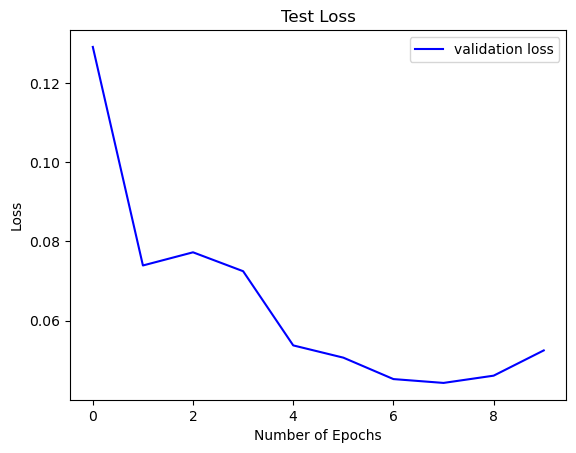

In [51]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


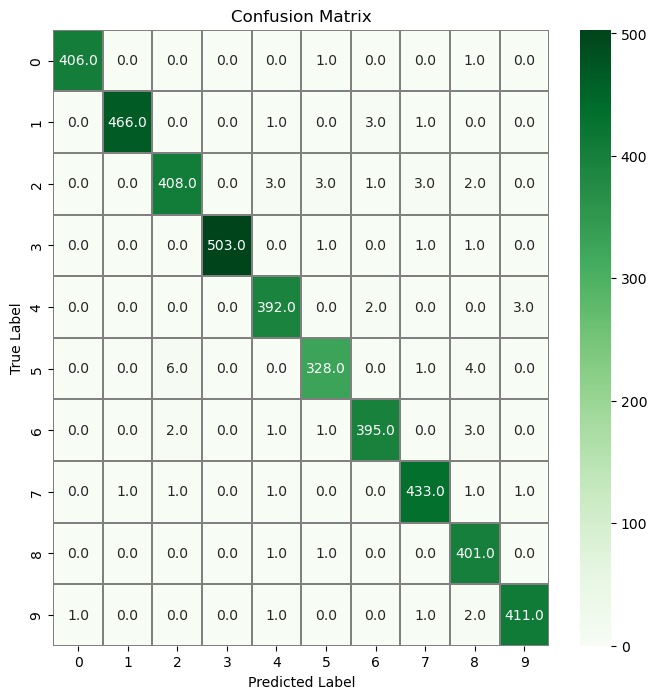

In [53]:
from sklearn.metrics import confusion_matrix
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [49]:
predictions = model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step
